In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [3]:
df = pd.read_csv('pure_posts_tokens.csv',index_col=0)
df.head()

,post_id,date,post_text,tokenized,pure_tokens
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"['сми', 'взбудоражить', 'предложение', 'путин'...","['сми', 'взбудоражить', 'предложение', 'путин'..."
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"['wsj', 'сообщить', 'признание', 'трамп', 'сло...","['сообщить', 'признание', 'трамп', 'сложность'..."
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"['ездить', 'зеленский', 'допинг', 'войти', 'ку...","['ездить', 'зеленский', 'допинг', 'войти', 'ку..."
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"['зеленский', 'ответить', 'предложение', 'пути...","['зеленский', 'ответить', 'предложение', 'пути..."
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"['фицо', 'ответить', 'критика', 'каллас', 'изз...","['фицо', 'ответить', 'критика', 'каллас', 'изз..."


**Латантное распределение Дирихле (LDA)**

In [5]:
count_vect = CountVectorizer(max_df=0.8, min_df=3, stop_words=None)
doc_term_matrix = count_vect.fit_transform(df['pure_tokens'].values.astype('U'))

**2 темы**

In [8]:
LDA_2 = LatentDirichletAllocation(n_components=2, random_state=42)
LDA_2.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=2, random_state=42)

In [10]:
for i,topic in enumerate(LDA_2.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['европа', 'украина', 'победа', 'военный', 'российский', 'война', 'свой', 'наш', 'страна', 'россия']


Top 10 words for topic #1:
['американский', 'свой', 'президент', 'киев', 'украинский', 'зеленский', 'россия', 'трамп', 'сша', 'украина']




**3 темы**

In [13]:
LDA_3 = LatentDirichletAllocation(n_components=3, random_state=42)
LDA_3.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [15]:
for i,topic in enumerate(LDA_3.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['май', 'москва', 'украина', 'европа', 'наш', 'победа', 'война', 'свой', 'страна', 'россия']


Top 10 words for topic #1:
['американский', 'свой', 'президент', 'киев', 'украинский', 'россия', 'зеленский', 'трамп', 'сша', 'украина']


Top 10 words for topic #2:
['направление', 'сила', 'войско', 'удар', 'военный', 'украинский', 'наш', 'российский', 'область', 'всу']




**4 темы**

In [18]:
LDA_4 = LatentDirichletAllocation(n_components=4, random_state=42)
LDA_4.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=4, random_state=42)

In [20]:
for i,topic in enumerate(LDA_4.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['президент', 'свой', 'конфликт', 'российский', 'военный', 'европа', 'страна', 'сша', 'украина', 'россия']


Top 10 words for topic #1:
['президент', 'американский', 'свой', 'россия', 'киев', 'украинский', 'зеленский', 'сша', 'трамп', 'украина']


Top 10 words for topic #2:
['сила', 'войско', 'направление', 'удар', 'военный', 'украинский', 'наш', 'российский', 'область', 'всу']


Top 10 words for topic #3:
['наш', 'украина', 'москва', 'день', 'май', 'россия', 'страна', 'свой', 'война', 'победа']




**Лучшая модель: 2 темы**

In [22]:
LDA = LatentDirichletAllocation(n_components=2, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=2, random_state=42)

In [23]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['европа', 'украина', 'победа', 'военный', 'российский', 'война', 'свой', 'наш', 'страна', 'россия']


Top 10 words for topic #1:
['американский', 'свой', 'президент', 'киев', 'украинский', 'зеленский', 'россия', 'трамп', 'сша', 'украина']




In [26]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(736, 2)

In [28]:
df['Topic_LDA'] = topic_values.argmax(axis=1)
df.head()

,post_id,date,post_text,tokenized,pure_tokens,Topic_LDA
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"['сми', 'взбудоражить', 'предложение', 'путин'...","['сми', 'взбудоражить', 'предложение', 'путин'...",1
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"['wsj', 'сообщить', 'признание', 'трамп', 'сло...","['сообщить', 'признание', 'трамп', 'сложность'...",1
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"['ездить', 'зеленский', 'допинг', 'войти', 'ку...","['ездить', 'зеленский', 'допинг', 'войти', 'ку...",0
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"['зеленский', 'ответить', 'предложение', 'пути...","['зеленский', 'ответить', 'предложение', 'пути...",1
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"['фицо', 'ответить', 'критика', 'каллас', 'изз...","['фицо', 'ответить', 'критика', 'каллас', 'изз...",0


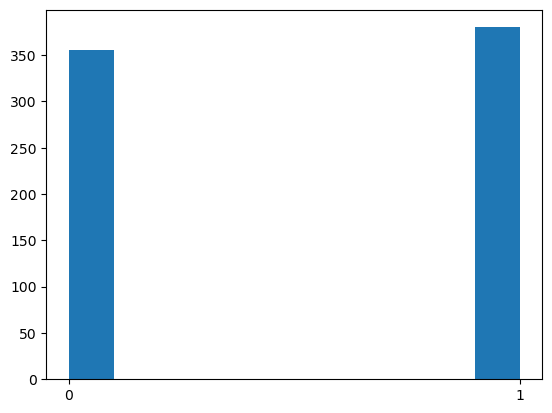

In [30]:
plt.hist(df['Topic_LDA'])
plt.xticks([0, 1]);

In [32]:
topic_1 = df[df['Topic_LDA']==0]
topic_1.shape

(356, 6)

In [34]:
topic_2 = df[df['Topic_LDA']==1]
topic_2.shape

(380, 6)

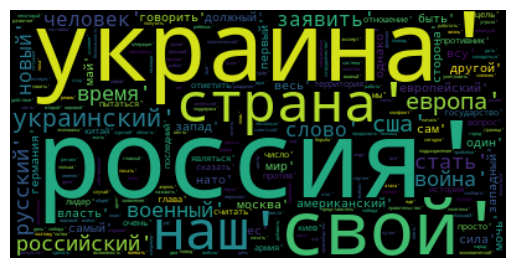

In [38]:
textt = ''.join(w for w in topic_1.pure_tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

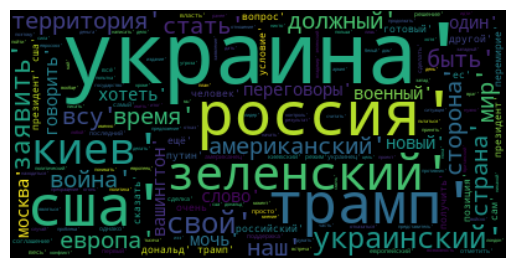

In [40]:
textt = ''.join(w for w in topic_2.pure_tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Неотрицательная матричная факторизация (NMF)**

In [42]:
tfidf_vect = TfidfVectorizer(max_df=1.0, min_df=2, stop_words=None)
doc_term_matrix = tfidf_vect.fit_transform(df['tokenized'].values.astype('U'))

**2 темы**

In [44]:
nmf = NMF(n_components=2, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=2, random_state=42)

In [46]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['год', 'киев', 'президент', 'который', 'зеленский', 'это', 'россия', 'сша', 'трамп', 'украина']


Top 10 words for topic #1:
['войско', 'противник', 'техника', 'боец', 'курский', 'наш', 'направление', 'враг', 'область', 'всу']




**3 темы**

In [48]:
nmf = NMF(n_components=3, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=3, random_state=42)

In [50]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['крым', 'американский', 'киев', 'переговоры', 'президент', 'россия', 'зеленский', 'сша', 'украина', 'трамп']


Top 10 words for topic #1:
['пехота', 'пункт', 'противник', 'боец', 'техника', 'курский', 'направление', 'враг', 'область', 'всу']


Top 10 words for topic #2:
['свой', 'украина', 'европа', 'страна', 'россия', 'год', 'победа', 'который', 'война', 'это']




**3 темы: визуализация**

In [53]:
topic_values = nmf.transform(doc_term_matrix)
topic_values.shape

(736, 3)

In [55]:
df['Topic_NMF'] = topic_values.argmax(axis=1)
df.head()

,post_id,date,post_text,tokenized,pure_tokens,Topic_LDA,Topic_NMF
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"['сми', 'взбудоражить', 'предложение', 'путин'...","['сми', 'взбудоражить', 'предложение', 'путин'...",1,0
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"['wsj', 'сообщить', 'признание', 'трамп', 'сло...","['сообщить', 'признание', 'трамп', 'сложность'...",1,0
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"['ездить', 'зеленский', 'допинг', 'войти', 'ку...","['ездить', 'зеленский', 'допинг', 'войти', 'ку...",0,0
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"['зеленский', 'ответить', 'предложение', 'пути...","['зеленский', 'ответить', 'предложение', 'пути...",1,0
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"['фицо', 'ответить', 'критика', 'каллас', 'изз...","['фицо', 'ответить', 'критика', 'каллас', 'изз...",0,2


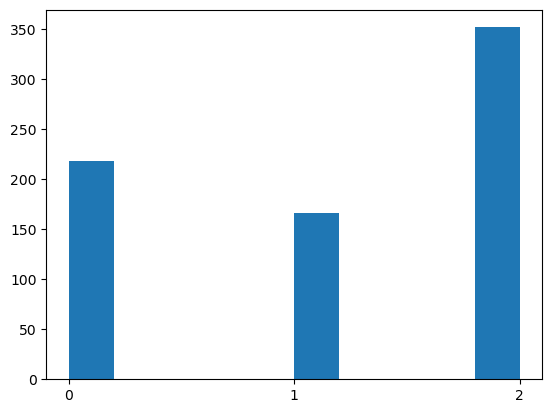

In [57]:
plt.hist(df['Topic_NMF'])
plt.xticks([0, 1, 2]);

In [59]:
topic_1 = df[df['Topic_NMF']==0]
topic_1.shape

(218, 7)

In [61]:
topic_2 = df[df['Topic_NMF']==1]
topic_2.shape

(166, 7)

In [63]:
topic_3 = df[df['Topic_NMF']==2]
topic_3.shape

(352, 7)

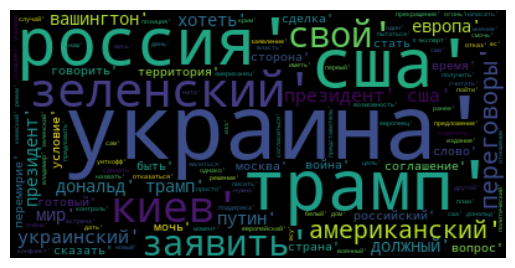

In [65]:
textt = ''.join(w for w in topic_1.pure_tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

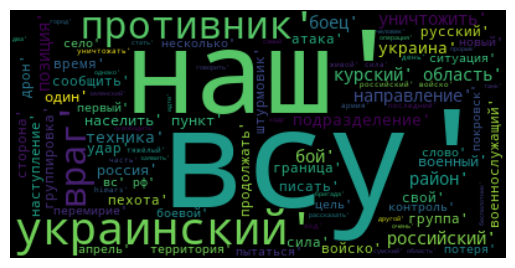

In [67]:
textt = ''.join(w for w in topic_2.pure_tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

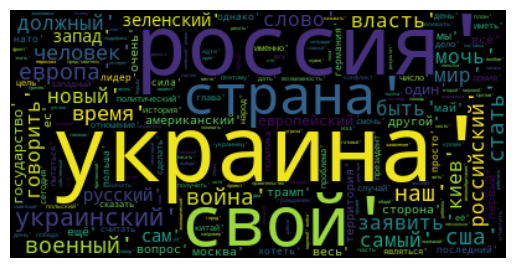

In [69]:
textt = ''.join(w for w in topic_3.pure_tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**2 темы: визуализация**

In [71]:
nmf = NMF(n_components=2, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=2, random_state=42)

In [73]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['год', 'киев', 'президент', 'который', 'зеленский', 'это', 'россия', 'сша', 'трамп', 'украина']


Top 10 words for topic #1:
['войско', 'противник', 'техника', 'боец', 'курский', 'наш', 'направление', 'враг', 'область', 'всу']




In [75]:
topic_values = nmf.transform(doc_term_matrix)
topic_values.shape

(736, 2)

In [77]:
df['Topic_NMF'] = topic_values.argmax(axis=1)
df.head()

,post_id,date,post_text,tokenized,pure_tokens,Topic_LDA,Topic_NMF
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"['сми', 'взбудоражить', 'предложение', 'путин'...","['сми', 'взбудоражить', 'предложение', 'путин'...",1,0
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"['wsj', 'сообщить', 'признание', 'трамп', 'сло...","['сообщить', 'признание', 'трамп', 'сложность'...",1,0
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"['ездить', 'зеленский', 'допинг', 'войти', 'ку...","['ездить', 'зеленский', 'допинг', 'войти', 'ку...",0,0
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"['зеленский', 'ответить', 'предложение', 'пути...","['зеленский', 'ответить', 'предложение', 'пути...",1,0
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"['фицо', 'ответить', 'критика', 'каллас', 'изз...","['фицо', 'ответить', 'критика', 'каллас', 'изз...",0,0


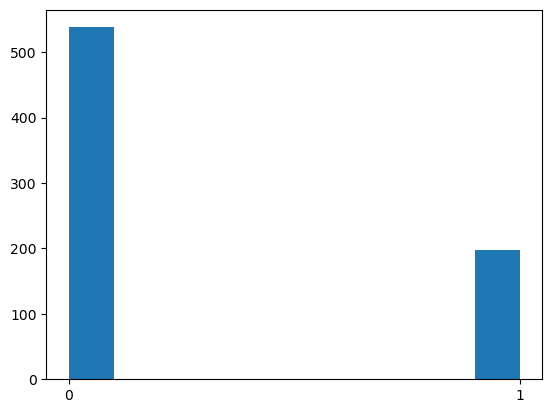

In [79]:
plt.hist(df['Topic_NMF'])
plt.xticks([0, 1]);

In [81]:
topic_1 = df[df['Topic_NMF']==0]
topic_1.shape

(538, 7)

In [83]:
topic_2 = df[df['Topic_NMF']==1]
topic_2.shape

(198, 7)

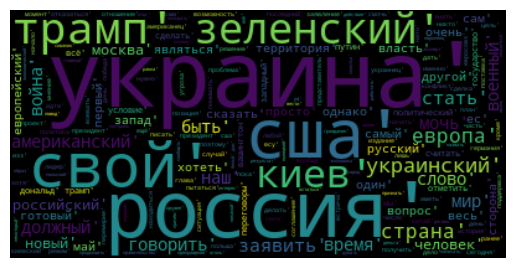

In [87]:
textt = ''.join(w for w in topic_1.pure_tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

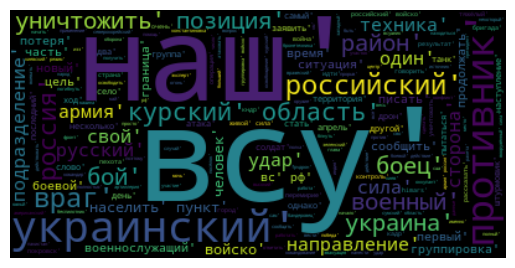

In [89]:
textt = ''.join(w for w in topic_2.pure_tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [141]:
topic_2

,Unnamed: 0.1,Unnamed: 0,post_id,post_text,tokenized,tokens,Topic_NMF
240,240,370,5332,"Навальный призывает бойкотировать выборы, а ка...","['навальный', 'призывать', 'бойкотировать', 'в...","['навальный', 'призывать', 'бойкотировать', 'в...",1
306,306,497,3385,Голосование 2018 тут https://vk.com/vybory_pre...,"['голосование', 'интернет', 'молодёжь', 'челов...","['голосование', 'интернет', 'молодёжь', 'челов...",1
331,331,532,3003,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
337,337,546,2925,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
368,368,584,2853,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
...,...,...,...,...,...,...,...
2144,2144,2702,188,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
2180,2180,2747,139,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
2215,2215,2789,97,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1
2253,2253,2833,52,Надо ставить походу,"['ставить', 'поход']","['ставить', 'поход']",1


In [105]:
df.to_csv('posts_topic.csv')